In [1]:
## library import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


## Data 준비

In [3]:
## google drive에서 압축된 dataset download
import gdown
url = 'https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: /content/oxford_pet.zip
811MB [00:06, 125MB/s]


'oxford_pet.zip'

In [4]:
## oxford_pet.zip이 보이는지 확인
!ls -l

total 791576
-rw-r--r-- 1 root root 810565619 Mar 13 14:56 oxford_pet.zip
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


In [5]:
## 압축풀기
!unzip -q oxford_pet.zip -d oxford_pet

In [6]:
## 압축이 풀린 directory 확인
!ls oxford_pet

annotations  images


In [7]:
## directory 설정
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')

In [8]:
## image file 수 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7390


In [9]:
## image file들을 읽어서 channel이 3이 아닌 image는 삭제
for image_file in image_files:
  image_path = os.path.join(image_dir, image_file)
  image = Image.open(image_path)
  image_mode = image.mode
  if image_mode != 'RGB':
    print(image_file, image_mode)
    image = np.asarray(image)
    print(image.shape)
    os.remove(image_path)

Egyptian_Mau_14.jpg RGBA
(800, 582, 4)
Abyssinian_34.jpg P
(202, 250)
Egyptian_Mau_129.jpg L
(325, 299)
staffordshire_bull_terrier_2.jpg L
(282, 500)
Egyptian_Mau_177.jpg P
(175, 246)
Abyssinian_5.jpg RGBA
(150, 200, 4)
Egyptian_Mau_191.jpg P
(214, 300)
Egyptian_Mau_167.jpg P
(275, 183)
Egyptian_Mau_186.jpg RGBA
(275, 183, 4)
Egyptian_Mau_139.jpg P
(250, 350)
staffordshire_bull_terrier_22.jpg L
(500, 364)
Egyptian_Mau_145.jpg P
(188, 216)


In [10]:
## image file 수 확인
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7378


In [11]:
#image_files[:10]을 출력하면 이름이 나올겁니다.
#모든 파일이름들을 읽어서 다시 정리해 줍니다. set의 특징은 중복이 안되는 점도 활용합니다.
class_list = set() #class_list를 집합 셋으로 한다.
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0] #.jpg 확장자를 떼준다.
    class_name = re.sub('_\d+', '', file_name)#_이후를 ''로 치환하라. 그러면 이름만 남는다.
    class_list.add(class_name) #그 파일이름들을 class_list에다가 add를 합니다.
class_list = list(class_list)
print(len(class_list))

37


In [12]:
#한번 이름들을 쫙 소팅을 해줍니다.
class_list.sort()
class_list

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [13]:
class_list[1]

'Bengal'

In [14]:


class2idx = {cls:idx for idx, cls in enumerate(class_list)}
class2idx

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [15]:
class2idx['Bengal'] #벵갈을 넣어주면 클래스 번호가 나옵니다.

1

In [16]:
## train, validation directory 생성
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [17]:
image_files.sort()

In [18]:
image_files[:10]

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg']

In [19]:
cnt = 0
previous_class = ""
for image_file in image_files:
    file_name = os.path.splitext(image_file)[0]
    class_name = re.sub('_\d+', '', file_name)
    if class_name == previous_class:
        cnt += 1
    else:
        cnt = 1
    if cnt <= 160:
        cpath = train_dir #160까지는 트레이닝 디렉토리에
    else:
        cpath = val_dir #넘어가면 validation 디렉토리에 넣습니다.
    image_path = os.path.join(image_dir, image_file)
    shutil.copy(image_path, cpath)
    previous_class = class_name

In [20]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

In [21]:
print(len(train_images), len(val_images))

5920 1458


In [22]:
train_images[:10]

['great_pyrenees_119.jpg',
 'Abyssinian_146.jpg',
 'newfoundland_197.jpg',
 'english_cocker_spaniel_161.jpg',
 'British_Shorthair_269.jpg',
 'newfoundland_139.jpg',
 'Egyptian_Mau_221.jpg',
 'havanese_108.jpg',
 'boxer_134.jpg',
 'Ragdoll_20.jpg']

In [23]:
val_images[:10]

['german_shorthaired_99.jpg',
 'boxer_88.jpg',
 'staffordshire_bull_terrier_94.jpg',
 'samoyed_90.jpg',
 'British_Shorthair_84.jpg',
 'shiba_inu_88.jpg',
 'japanese_chin_77.jpg',
 'Ragdoll_87.jpg',
 'leonberger_75.jpg',
 'chihuahua_83.jpg']

## TFRecord File 만들기

In [24]:
IMG_SIZE = 224 #이미지 사이즈 통일

In [25]:
## TFRecord 저장할 directory와 file 경로 설정
tfr_dir = os.path.join(data_dir, 'tfrecord')
os.makedirs(tfr_dir, exist_ok=True)

tfr_train_dir = os.path.join(tfr_dir, 'cls_train.tfr')
tfr_val_dir = os.path.join(tfr_dir, 'cls_val.tfr')

In [26]:
## TFRecord writer 생성
writer_train = tf.io.TFRecordWriter(tfr_train_dir)
writer_val = tf.io.TFRecordWriter(tfr_val_dir)

In [27]:
# The following functions can be used to convert a value to a type compatible
# with tf.Example.

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [28]:
## Training data로 tfrecord 만들기
n_train = 0

train_files = os.listdir(train_dir)
for train_file in train_files:
  train_path = os.path.join(train_dir, train_file)
  image = Image.open(train_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(train_file)[0] #Bangal_101
  class_name = re.sub('_\d+', '', file_name)
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_train.write(example.SerializeToString())
  n_train += 1

writer_train.close()
print(n_train)

5920


In [29]:
## Validation data로 tfrecord 만들기
n_val = 0

val_files = os.listdir(val_dir)
for val_file in val_files:
  val_path = os.path.join(val_dir, val_file)
  image = Image.open(val_path)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  bimage = image.tobytes()

  file_name = os.path.splitext(val_file)[0] #Bangal_101
  class_name = re.sub('_\d+', '', file_name)
  class_num = class2idx[class_name]

  example = tf.train.Example(features=tf.train.Features(feature={
      'image': _bytes_feature(bimage),
      'cls_num': _int64_feature(class_num)
  }))
  writer_val.write(example.SerializeToString())
  n_val += 1

writer_val.close()
print(n_val)

1458


In [30]:
!ls -l $tfr_dir

total 1085016
-rw-r--r-- 1 root root 891486880 Mar 13 14:57 cls_train.tfr
-rw-r--r-- 1 root root 219558762 Mar 13 14:57 cls_val.tfr


## Classification

In [31]:
## Hyper Parameters
N_CLASS = len(class_list)
N_EPOCHS = 20
N_BATCH = 40
N_TRAIN = n_train
N_VAL = n_val
IMG_SIZE = 224
learning_rate = 0.0001
steps_per_epoch = N_TRAIN / N_BATCH
validation_steps = int(np.ceil(N_VAL / N_BATCH))

In [32]:
## tfrecord file을 data로 parsing해주는 function
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'cls_num': tf.io.FixedLenFeature([], tf.int64)              
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)    
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
    image = tf.cast(image, tf.float32)/255. 

    label = tf.cast(parsed_features['cls_num'], tf.int64)

    return image, label

In [33]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset(tfr_train_dir)
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(N_TRAIN).prefetch(
    tf.data.experimental.AUTOTUNE).batch(N_BATCH).repeat()

In [34]:
## validation dataset 만들기
val_dataset = tf.data.TFRecordDataset(tfr_val_dir)
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(N_BATCH).repeat()

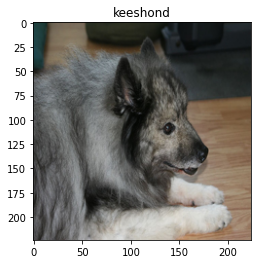

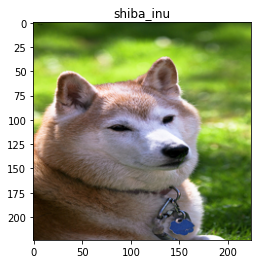

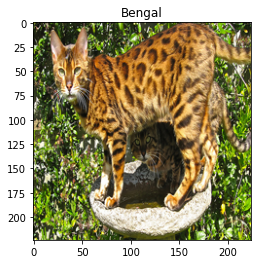

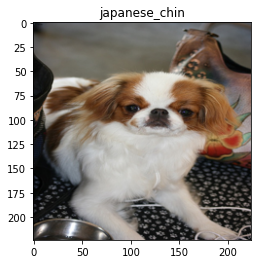

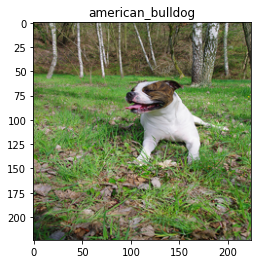

In [35]:
for image, label in train_dataset.take(5):
  plt.imshow(image[0])
  title = class_list[label[0].numpy()]
  plt.title(title)
  plt.show()

In [36]:
# Sequential API를 사용하여 model 구성
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    return model

In [37]:
## Create model, compile & summary
model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [38]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 39s 53ms/step - loss: 3.6062 - accuracy: 0.0305 - val_loss: 3.4200 - val_accuracy: 0.0953
Epoch 2/20
148/148 [==============================] - 9s 50ms/step - loss: 3.3744 - accuracy: 0.0946 - val_loss: 3.1431 - val_accuracy: 0.1365
Epoch 3/20
148/148 [==============================] - 8s 49ms/step - loss: 3.0670 - accuracy: 0.1672 - val_loss: 2.9567 - val_accuracy: 0.1660
Epoch 4/20
148/148 [==============================] - 8s 49ms/step - loss: 2.8091 - accuracy: 0.2139 - val_loss: 2.8351 - val_accuracy: 0.2085
Epoch 5/20
148/148 [==============================] - 8s 49ms/step - loss: 2.6113 - accuracy: 0.2690 - val_loss: 2.7429 - val_accuracy: 0.2277
Epoch 6/20
148/148 [==============================] - 8s 49ms/step - loss: 2.4003 - accuracy: 0.3134 - val_loss: 2.6785 - val_accuracy: 0.2401
Epoch 7/20
148/148 [==============================] - 8s 49ms/step - loss: 2.1470 - accuracy: 0.3909 - val_loss: 2.6413 - val_accuracy: 0.251

In [39]:
# Sequential API를 사용하여 model 구성
def create_bn_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', 
                                  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='SAME'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.ReLU())    
    model.add(keras.layers.Dense(N_CLASS, activation='softmax'))
    return model

In [40]:
## Create model, compile & summary
model = create_bn_model()

## learning rate scheduing
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*5,
                                                          decay_rate=0.5,
                                                          staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 64)     

In [41]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 12s 69ms/step - loss: 3.4665 - accuracy: 0.1157 - val_loss: 5.1842 - val_accuracy: 0.0274
Epoch 2/20
148/148 [==============================] - 11s 67ms/step - loss: 1.6027 - accuracy: 0.6054 - val_loss: 5.2843 - val_accuracy: 0.0418
Epoch 3/20
148/148 [==============================] - 11s 67ms/step - loss: 0.6377 - accuracy: 0.9153 - val_loss: 3.9338 - val_accuracy: 0.0981
Epoch 4/20
148/148 [==============================] - 11s 67ms/step - loss: 0.2085 - accuracy: 0.9926 - val_loss: 2.7939 - val_accuracy: 0.2565
Epoch 5/20
148/148 [==============================] - 11s 67ms/step - loss: 0.0770 - accuracy: 0.9999 - val_loss: 2.6092 - val_accuracy: 0.3018
Epoch 6/20
148/148 [==============================] - 11s 67ms/step - loss: 0.0414 - accuracy: 1.0000 - val_loss: 2.5785 - val_accuracy: 0.3093
Epoch 7/20
148/148 [==============================] - 11s 67ms/step - loss: 0.0326 - accuracy: 1.0000 - val_loss: 2.5809 - val_accuracy:

### Pretrained MobileNetV2 사용하여 학습하기

In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [43]:
from tensorflow.keras import models
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D

In [44]:
mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

9412608/9406464 [==============================] - 0s 0us/step


In [45]:
mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [46]:
def create_mv_model():
  model = models.Sequential()
  model.add(mobilenetv2)
  model.add(GlobalAveragePooling2D())  
  model.add(Dense(N_CLASS, activation='softmax'))
  return model

In [47]:
## Create model, compile & summary
model = create_mv_model()

## learning rate scheduing
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                                          decay_steps=steps_per_epoch*5,
                                                          decay_rate=0.5,
                                                          staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
history = model.fit(
    train_dataset,
    epochs=N_EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

Epoch 1/20
148/148 [==============================] - 36s 212ms/step - loss: 2.0660 - accuracy: 0.4925 - val_loss: 0.6005 - val_accuracy: 0.8066
Epoch 2/20
148/148 [==============================] - 32s 206ms/step - loss: 0.2521 - accuracy: 0.9377 - val_loss: 0.4433 - val_accuracy: 0.8491
Epoch 3/20
148/148 [==============================] - 31s 206ms/step - loss: 0.1073 - accuracy: 0.9797 - val_loss: 0.4042 - val_accuracy: 0.8669
Epoch 4/20
148/148 [==============================] - 31s 205ms/step - loss: 0.0581 - accuracy: 0.9924 - val_loss: 0.3562 - val_accuracy: 0.8807
Epoch 5/20
148/148 [==============================] - 31s 206ms/step - loss: 0.0276 - accuracy: 0.9972 - val_loss: 0.3481 - val_accuracy: 0.8855
Epoch 6/20
148/148 [==============================] - 32s 206ms/step - loss: 0.0198 - accuracy: 0.9978 - val_loss: 0.3087 - val_accuracy: 0.8985
Epoch 7/20
148/148 [==============================] - 31s 206ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2788 - val_ac